In [19]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, mutual_info_regression
import matplotlib.pyplot as plt

Выявлять связи между различными элементами будем с помощью метода библиотеки scikit-learn SelectKBest, который отбирает К лучших параметров по отношению к переданному в качестве y.

Сначала будем смотреть на корреляцию элементов в датасете с уже выбранными параметрами Day2_PickedKBest.csv
Затем проверим датасет, в котором сохранены все характеристики

In [8]:
dataset = pd.read_csv("Day2_PickedKBest.csv")
dataset = dataset.drop("Unnamed: 0", axis = 1)
dataset.head()

,Full_name,Kind,Name,Number_PP,Owners_name,Qty_stock,Remaining_amount,Price
0,700.0,1.0,780.0,1433.0,26.0,382.24585,52.0,188.96
1,218.0,1.0,263.0,412.0,49.0,549.48921,39.0,95.73
2,6.0,1.0,6.0,10.0,2.0,3962.00000,280.0,99.83
3,351.0,1.0,401.0,633.0,57.0,294.11689,44.0,93.28
4,675.0,1.0,755.0,1402.0,8.0,504.36293,4.0,52.33


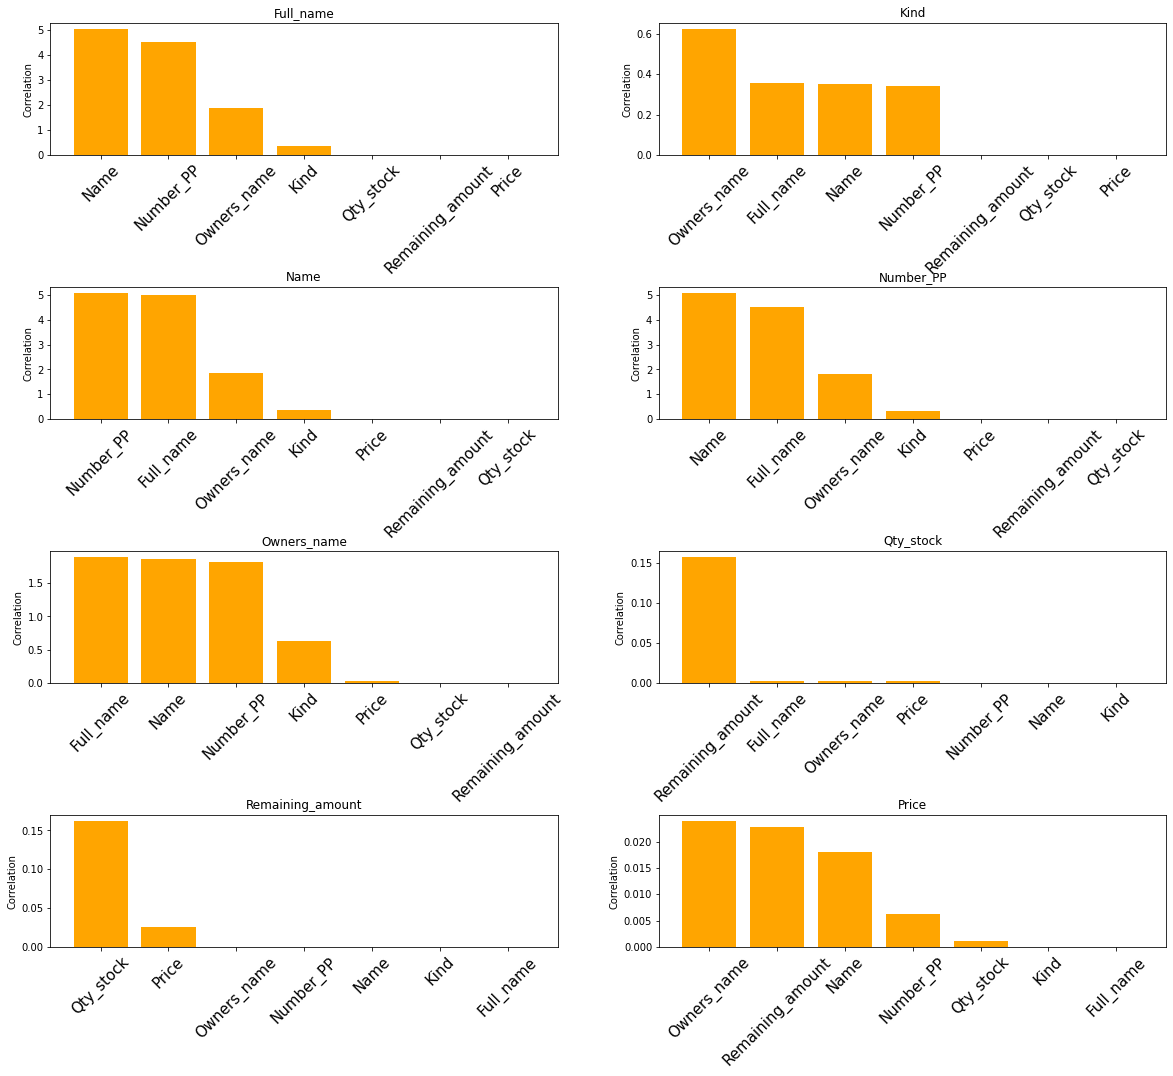

In [94]:
X = dataset.copy(deep=True)
fig, ax = plt.subplots(4, 2, figsize = (20,17), gridspec_kw={
                                                                'hspace': 1
                                                            })
cnt1, cnt2 = 0, 0
for i in X.columns:
#     if i != 'Price':
    tmp_X = X.copy(deep=True)
    tmp_X = X.drop([i], axis=1) 
    tmp_y = X[i]
    column_names = tmp_X.columns
    fs = SelectKBest(score_func = mutual_info_regression, k = 'all')
    tmp_X = fs.fit_transform(tmp_X, tmp_y)
    new_columns = list(sorted(zip(fs.scores_, column_names), reverse=True))
    labels = [i[1] for i in new_columns]
    values = [i[0] for i in new_columns]
    distance = np.arange(len(labels))
    distance = distance
    ax[cnt1, cnt2].bar(distance, values, color='orange')
    ax[cnt1, cnt2].set_xticks(distance)
    ax[cnt1, cnt2].set_xticklabels(labels, fontdict={'fontsize': 15,
                                                     'verticalalignment': 'top',
                                                     'rotation': 45
                                                    })
    ax[cnt1, cnt2].set_ylabel('Correlation')
    ax[cnt1, cnt2].set_title(i)
    cnt2 += 1
    if (cnt2 == 2):
        cnt2 = 0
        cnt1 += 1

<ipython-input-93-9c59b8ba14f2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i][j] = str(X[i][j])


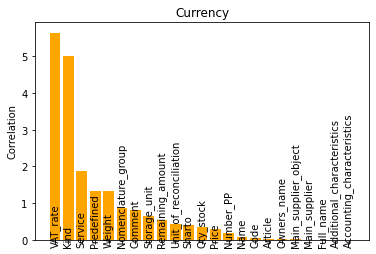

In [93]:
from sklearn import preprocessing

X = pd.read_csv('Task1_3_Corrected.csv')
X = X.drop("Unnamed: 0", axis=1)
# fig, ax = plt.subplot()
cnt1, cnt2 = 0, 0
encoder = preprocessing.LabelEncoder()
objectCols = X.select_dtypes(include = ['object'])
for i in objectCols:
    for j in range(0, len(X[i])):
        X[i][j] = str(X[i][j])
    encoder = preprocessing.LabelEncoder()
    X[i] = encoder.fit_transform(X[i])


dataset.head()
for i in X.columns:
#     if i != 'Price':
    tmp_X = X.copy(deep=True)
    tmp_X = X.drop([i], axis=1) 
    tmp_y = X[i]
    column_names = tmp_X.columns
    fs = SelectKBest(score_func = mutual_info_regression, k = 'all')
    tmp_X = fs.fit_transform(tmp_X, tmp_y)
    new_columns = list(sorted(zip(fs.scores_, column_names), reverse=True))
    labels = [i[1] for i in new_columns]
    values = [i[0] for i in new_columns]
    distance = np.arange(len(labels))
#     distance = distance
    plt.bar(distance, values, color='orange')
#     plt.set_xticks(distance)
    plt.xticks(distance, labels, rotation = 90, va='bottom')
#     plt.set_xticklabels(labels, fontdict={'fontsize': 10,
#                                                      'verticalalignment': 'top',
#                                                      'rotation': 90
#                                                     })
    plt.ylabel('Correlation')
    plt.title(i)
    plt.savefig(f'Graphs/Graph of {i}.jpg')
    plt.clf
    cnt2 += 1
    if (cnt2 == 5):
        cnt2 = 0
        cnt1 += 1